<a href="https://colab.research.google.com/github/mehdiiiii786/Mhdii-learning-ML-/blob/main/ML_Logistic_REG_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt


In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed','equip','churn']]

In [5]:
churn_df

,tenure,age,address,income,ed,equip,churn
0,11.0,33.0,7.0,136.0,5.0,0.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,0.0,0.0
196,34.0,23.0,3.0,24.0,1.0,0.0,0.0
197,6.0,32.0,10.0,47.0,1.0,0.0,0.0
198,24.0,30.0,0.0,25.0,4.0,0.0,1.0


In [8]:
churn_df['churn']= churn_df['churn'].astype('int')

/tmp/ipython-input-8-1001359922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn']= churn_df['churn'].astype('int')


In [9]:
churn_df

,tenure,age,address,income,ed,equip,churn
0,11.0,33.0,7.0,136.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,0.0,0
...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,0.0,1


In [10]:
x = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed','equip']])

In [11]:
y = np.asarray(churn_df['churn'])

In [15]:
x_norm = StandardScaler().fit(x).transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.2, random_state =4)

In [20]:
LR = LogisticRegression().fit(x_train, y_train)

In [21]:
yhat_prob = LR.predict_proba(x_test)

In [22]:
yhat_prob

array([[0.74067852, 0.25932148],
       [0.93062767, 0.06937233],
       [0.82393297, 0.17606703],
       [0.9349535 , 0.0650465 ],
       [0.86945595, 0.13054405],
       [0.73576412, 0.26423588],
       [0.78990206, 0.21009794],
       [0.89557021, 0.10442979],
       [0.26152729, 0.73847271],
       [0.95201216, 0.04798784],
       [0.85681008, 0.14318992],
       [0.87884471, 0.12115529],
       [0.58308241, 0.41691759],
       [0.32108196, 0.67891804],
       [0.89511033, 0.10488967],
       [0.58062331, 0.41937669],
       [0.67902398, 0.32097602],
       [0.72756087, 0.27243913],
       [0.68241297, 0.31758703],
       [0.79604845, 0.20395155],
       [0.91377404, 0.08622596],
       [0.71856987, 0.28143013],
       [0.96452304, 0.03547696],
       [0.59405745, 0.40594255],
       [0.58971695, 0.41028305],
       [0.97378214, 0.02621786],
       [0.50352248, 0.49647752],
       [0.68283076, 0.31716924],
       [0.71217391, 0.28782609],
       [0.98277553, 0.01722447],
       [0.

In [25]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])

In [26]:
coefficients

,0
tenure,-0.873523
age,-0.255622
address,-0.176058
income,-0.078320
ed,0.084015
equip,0.764395


<Axes: >

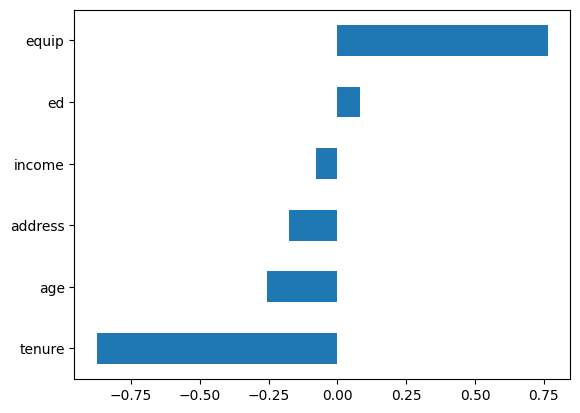

In [28]:
coefficients.sort_values().plot(kind = 'barh')

In [29]:
log_loss(y_test, yhat_prob)

0.648366350446872